# Binary classification task

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [71]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)

In [72]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.tail()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [73]:
df.shape

(768, 9)

In [74]:
df.duplicated().sum()

0

In [75]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BP,0
SkinThickness,0
Insulin,0
BMI,0
DPF,0
Age,0
Outcome,0


In [76]:
# Split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [54]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [78]:
df.head(1)

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [79]:
# Build simple ANN
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=8)),  # Hidden layer-1 and inputs
model.add(Dense(8, activation='relu')),  # Hidden layer -2
model.add(Dense(1, activation='sigmoid'))  # Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [82]:


# Train the model
history=model.fit(X_train, y_train, epochs=120, batch_size=30, validation_data=(X_test, y_test))
history


Epoch 1/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6039 - loss: 0.6734 - val_accuracy: 0.6234 - val_loss: 0.6578
Epoch 2/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6715 - loss: 0.6341 - val_accuracy: 0.6169 - val_loss: 0.6413
Epoch 3/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6819 - loss: 0.6172 - val_accuracy: 0.6299 - val_loss: 0.6259
Epoch 4/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6553 - loss: 0.6030 - val_accuracy: 0.6494 - val_loss: 0.6104
Epoch 5/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6559 - loss: 0.5783 - val_accuracy: 0.6429 - val_loss: 0.5980
Epoch 6/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7029 - loss: 0.5448 - val_accuracy: 0.6429 - val_loss: 0.5858
Epoch 7/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7054 - loss: 0.5303 - val_accuracy: 0.6753 - val_loss: 0.5763
Epoch 8/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7221 - loss: 0.5251 - val_accuracy: 0.7143 

In [83]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7394 - loss: 0.5940 
Test Accuracy: 75.32%


In [84]:
# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [85]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[80 19]
 [19 36]]


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


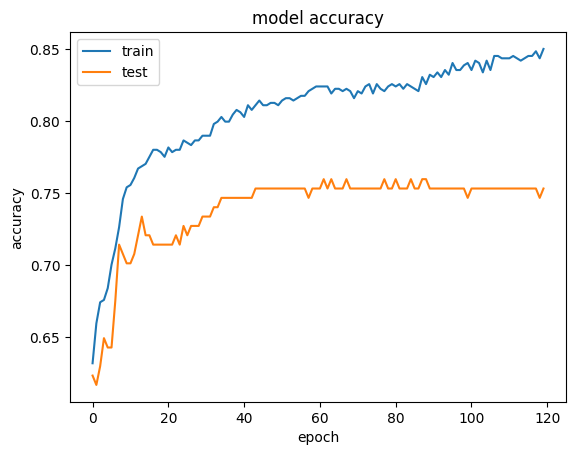

In [86]:
# list all data in history

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

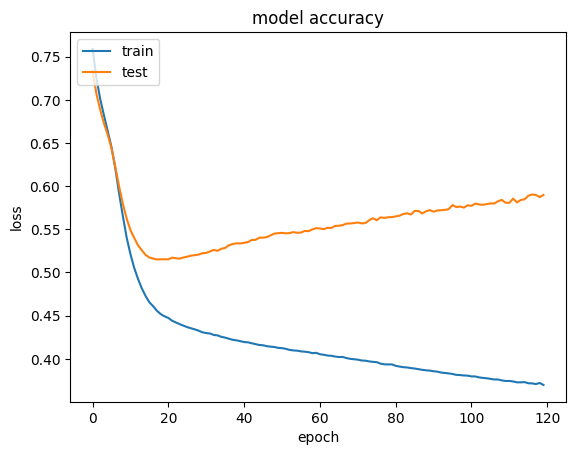

In [65]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
from kerastuner.tuners import RandomSearch

ModuleNotFoundError: No module named 'kerastuner'

In [67]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=8))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [68]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='bmi')

NameError: name 'RandomSearch' is not defined